# Curso IA UBA

Creado por [Pablo Casas](https://twitter.com/pabloc_ds)


--- 

## Embeddings en Keras 


Objetivo: 





### 1) Montando el drive en google colab

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")
!ls

Mounted at /content/drive
'03 - Introducción a la clasificación con Keras'
'04 - Detección de anomalías con Keras'
'05 - Embeddings con Keras'
'06 - Autoencoders con Keras'
'07 - Integrador.ipynb'
'CV2 - 01 - Capas_convolucionales.ipynb'
'CV2 - 02 red_cnn_simple.ipynb'
'CV2 - 03 Modelo_convolucional_aplicacion_keras.ipynb'
 data
 desorden
'Machine Learning 1 - 8.1 Boosting.ipynb'
'Machine Learning 1 - 8.2 Bagging.ipynb'
 model_plot.png
 model.png
 models


### 2) Carga de datos y librerías

In [2]:
!pip install funpymodeling

     |████████████████████████████████| 225kB 4.2MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from funpymodeling.exploratory import status, freq_tbl, profiling_num
from funpymodeling.data_prep import todf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
data=pd.read_csv('data/encuesta_sysarmy_arg_2019_1.csv')

In [6]:
data.shape

(4482, 47)

In [7]:
pd.set_option('max_rows', 100)
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Me identifico,0,0.000000,0,0.000000,3,object
1,Tengo,0,0.000000,0,0.000000,58,int64
2,Dónde estás trabajando,0,0.000000,0,0.000000,25,object
3,Años de experiencia,0,0.000000,235,0.052432,52,float64
4,Años en la empresa actual,0,0.000000,1038,0.231593,48,float64
5,Años en el puesto actual,0,0.000000,921,0.205489,39,float64
6,¿Gente a cargo?,0,0.000000,3335,0.744087,47,int64
7,Nivel de estudios alcanzado,0,0.000000,0,0.000000,7,object
8,Estado,0,0.000000,0,0.000000,3,object
9,Carrera,554,0.123606,0,0.000000,1485,object


In [8]:
data.head()

,Me identifico,Tengo,Dónde estás trabajando,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,Nivel de estudios alcanzado,Estado,Carrera,Universidad,Realizaste cursos de especialización,¿Contribuís a proyectos open source?,¿Programás como hobbie?,Trabajo de,Plataformas,Lenguajes de programación,"Frameworks, herramientas y librerías",Bases de datos,QA / Testing,IDEs,¿Qué SO usás en tu laptop/PC para trabajar?,¿Y en tu celular?,¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tipo de contrato,Salario mensual BRUTO (en tu moneda local),Salario mensual NETO (en tu moneda local),¿Qué tan conforme estás con tu sueldo?,Cómo creés que está tu sueldo con respecto al último semestre,Recibís algún tipo de bono,A qué está atado el bono,¿Tuviste ajustes por inflación en 2018?,¿De qué % fue el ajuste?,¿En qué mes fue el último ajuste?,¿Sufriste o presenciaste situaciones de violencia laboral?,Orientación sexual,¿Tenés algún tipo de discapacidad?,¿Sentís que esto te dificultó el conseguir trabajo?,¿A qué eventos de tecnología asististe en el último año?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra
0,Hombre,22,Catamarca,2.0,1.0,1.0,0,Universitario,En curso,ING informática,Unca,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,Linux,"HTML, Javascript, PHP, Python","Django, Toba Framework","MySQL, PostgreSQL",Selenium,Atom,Linux,Android,No,0.0,Bruto,Full-Time,35000.0,33000.0,2,3,Menos de un sueldo,Mix de las anteriores,Dos,25.0,5,Jamás,Heterosexual,NaN,NaN,NaN,1001-2000,Producto basado en Software,8,9,2.0,Capacitaciones y/o cursos
1,Hombre,23,Catamarca,2.0,1.0,1.0,0,Secundario,Completado,Ing informática,UNCa,"Sí, de forma particular",No,Sí,"Developer, SysAdmin y Redes","Linux, VMWare, Proxmox, Mikrotik, Cisco","Bash/Shell, CSS, HTML, Javascript, PHP, Python...","Cordova, Django, Node.js, React.js, WordPress,...","Informix, MariaDB, MongoDB, MySQL, PostgreSQL",Selenium,"Atom, Nano",Linux,Android,No,0.0,Porcentaje de mi sueldo,Part-Time,25000.0,22000.0,2,1,Un sueldo,Mix de las anteriores,Uno,22.0,12,Jamás,Heterosexual,NaN,NaN,Charlas online,51-100,Producto basado en Software,8,10,2.0,"Capacitaciones y/o cursos, Licencia de paterni..."
2,Mujer,35,Chaco,8.0,7.0,2.0,2,Posgrado,En curso,MTI,Universidad del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,Developer,NaN,".NET, R",".NET Core, shiny, entre otras librerías de R",MSSQL,NaN,"RStudio, Sublime Text, Visual Studio",Windows,Android,"Sí, pasiva",0.0,Neto,Full-Time,50000.0,45000.0,2,2,De uno a tres sueldos,Performance de la compañía,Dos,4.0,10,En mi trabajo actual,dgsdg,NaN,No,varios,201-500,Otras industrias,4,4,0.2,"Capacitaciones y/o cursos, Licencia de paterni..."
3,Hombre,41,Chaco,20.0,2.0,10.0,0,Universitario,Completado,Lic en sistemas,Uba / CAECE,"Sí, los pagó un empleador",No,No,Developer,NaN,".NET, C#, CSS, HTML, Javascript, TypeScript",Angular,MySQL,NaN,"Visual Studio, Vs code",Mac OS X,Android,No,0.0,Bruto,Freelance,70000.0,65000.0,3,2,No,No recibo bono,Más de dos,40.0,10,Jamás,Heterosexual,NaN,NaN,Ninguno,1-10,Servicios / Consultoría de Software / Digital,5,1,-1.0,"Horarios flexibles, Vacaciones flexibles (adic..."
4,Hombre,35,Chaco,5.0,3.0,2.0,0,Universitario,Completado,Analisis en Sistemas,UTN,"Sí, los pagó un empleador",No,No,Product Manager,"Google Cloud Platform/App Engine, Linux",NaN,NaN,MySQL,NaN,NaN,Linux,Android,No,0.0,Neto,Full-Time,35000.0,28780.0,2,2,No,No recibo bono,Uno,10.0,10,En mi trabajo actual,Heterosexual,NaN,No,NaN,501-1000,Producto basado en Software,8,8,1.0,"Capacitaciones y/o cursos, Clases de idiomas, ..."


In [11]:
#d_insp.score.hist()

̇¿Cómo usar `funpymodeling`? 
https://www.youtube.com/watch?v=1wwQ9mWxrVE

### 3) Preparación de datos



In [12]:
input='Trabajo de'
target='Salario mensual BRUTO (en tu moneda local)'
data_x=data[[input]]

# Output:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#data[[target]]
data_y=scaler.fit_transform(data[[target]])
#data_y=data[[target]]

In [13]:
profiling_num(data[[target]])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Salario mensual BRUTO (en tu moneda local),66708.338151,387420.626264,5.807679,31.8898,14500.0,32508.25,49000.0,70000.0,137000.0,250000.0


In [14]:
profiling_num(data_y)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,0,1.117159e-17,1.000112,8.952277e+16,-0.172123,-0.134774,-0.088286,-0.045713,0.008497,0.181455,0.47316


In [15]:
#data_y=np.where(data[[target]] > 137000, 137000, data[[target]] )
data_y=np.where(data_y >0.47316, 0.47316, data_y)

In [16]:
from sklearn.model_selection import train_test_split

x_train_base, x_test_base, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8520679b0>]],
      dtype=object)

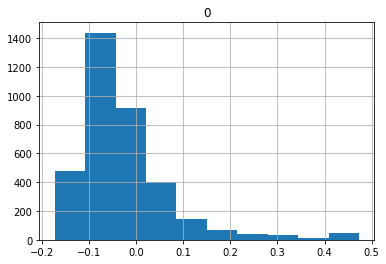

In [17]:
todf(y_train).hist()

### x) Enfoque 1: Hacer one hot encoding

In [18]:
x_train1=pd.get_dummies(x_train_base)

x_test1=pd.get_dummies(x_test_base).reindex(columns = x_train1.columns).fillna(0)

In [19]:
x_train_base

,Trabajo de
3810,Developer
2741,Developer
3466,Enseñando inglés
1154,UX
2080,Preventa
...,...
1447,Middleware
556,Consultor
299,Manager / Director
3995,SysAdmin / DevOps / SRE


In [20]:
x_train1.shape

(3585, 366)

In [21]:
# Carga de libs

from keras.models import Sequential
from keras.layers import Dense

In [22]:
_,in_shape=x_train1.shape
in_shape

366

In [23]:
model1 = Sequential()

model1.add(Dense(128, input_dim=in_shape)) # input_dim son las variables de entrada
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='linear'))  # linear: sale lo que entra

#### Compilación del modelo:

In [24]:
model1.compile(optimizer='adam',
              loss='MSE',
              metrics='MAE')

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               46976     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 55,297
Trainable params: 55,297
Non-trainable params: 0
_________________________________________________________________


### x) Fit del modelo! (entrenamiento)

In [26]:
history1 = model1.fit(x_train1, y_train, epochs=40, batch_size=4096, validation_split=0.2)

Epoch 1/40
1/1 [==============================] - 0s 202ms/step - loss: 0.0161 - MAE: 0.0925 - val_loss: 0.0112 - val_MAE: 0.0706
Epoch 2/40
1/1 [==============================] - 0s 20ms/step - loss: 0.0138 - MAE: 0.0779 - val_loss: 0.0104 - val_MAE: 0.0676
Epoch 3/40
1/1 [==============================] - 0s 19ms/step - loss: 0.0127 - MAE: 0.0728 - val_loss: 0.0096 - val_MAE: 0.0657
Epoch 4/40
1/1 [==============================] - 0s 18ms/step - loss: 0.0115 - MAE: 0.0699 - val_loss: 0.0091 - val_MAE: 0.0656
Epoch 5/40
1/1 [==============================] - 0s 19ms/step - loss: 0.0107 - MAE: 0.0693 - val_loss: 0.0091 - val_MAE: 0.0671
Epoch 6/40
1/1 [==============================] - 0s 19ms/step - loss: 0.0103 - MAE: 0.0701 - val_loss: 0.0091 - val_MAE: 0.0684
Epoch 7/40
1/1 [==============================] - 0s 20ms/step - loss: 0.0101 - MAE: 0.0705 - val_loss: 0.0091 - val_MAE: 0.0681
Epoch 8/40
1/1 [==============================] - 0s 19ms/step - loss: 0.0099 - MAE: 0.0693 - va

In [27]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_all(history, metric):
  fig1 = go.Figure()
  fig1.add_trace(go.Scattergl(y=history.history[metric], name='Train'))
  fig1.add_trace(go.Scattergl(y=history.history['val_'+metric], name='Valid'))
  fig1.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title=metric)

  fig2 = go.Figure()
  fig2.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
  fig2.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
  fig2.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='Loss')

  return [fig1,fig2]

In [28]:
fig1,fig2=plot_all(history1, 'MAE')
fig1.show()
fig2.show()

## ¿Podemos hacerlo mejor?

Creo que si.

In [29]:
# Antes:
#x_train1=pd.get_dummies(d_insp2)
x_train1.shape

(3585, 366)

In [30]:
data_x[input]

0                         Developer
1       Developer, SysAdmin y Redes
2                         Developer
3                         Developer
4                   Product Manager
                   ...             
4477                      Developer
4478                      Developer
4479        SysAdmin / DevOps / SRE
4480                Project Manager
4481             Manager / Director
Name: Trabajo de, Length: 4482, dtype: object

In [31]:
# Ahora
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit_transform(data_x[input]) # ¿esta bien esto?

array([129, 130, 129, ..., 347, 265, 221])

In [32]:
x_train2=le.transform(x_train_base[input]) 
x_test2=le.transform(x_test_base[input])

In [33]:
x_train2.shape

(3585,)

In [34]:
x_train2

array([129, 129, 147, ..., 221, 347, 347])

In [35]:
in_dim=x_train2.max()+1
in_dim

443

In [36]:
from keras.layers import Embedding, Flatten, Dropout

In [37]:
model2 = Sequential()

model2.add(Embedding(input_dim=in_dim, output_dim=4, input_length=1))
model2.add(Flatten())
#model2.add(Dense(4, activation='relu'))
model2.add(Dense(1))  # linear: sale lo que entra

In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 4)              1772      
_________________________________________________________________
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [39]:
model2.compile(optimizer=keras.optimizers.Adam(lr=0.1),  # default lr=0.01 
              loss='MSE',
              metrics='MAE')

In [40]:
history2 = model2.fit(x_train2, y_train, epochs=40, batch_size=2048, validation_split=0.2)

Epoch 1/40
2/2 [==============================] - 0s 51ms/step - loss: 0.0284 - MAE: 0.1189 - val_loss: 0.0157 - val_MAE: 0.1016
Epoch 2/40
2/2 [==============================] - 0s 10ms/step - loss: 0.0184 - MAE: 0.1081 - val_loss: 0.0234 - val_MAE: 0.1225
Epoch 3/40
2/2 [==============================] - 0s 9ms/step - loss: 0.0245 - MAE: 0.1221 - val_loss: 0.0110 - val_MAE: 0.0751
Epoch 4/40
2/2 [==============================] - 0s 9ms/step - loss: 0.0137 - MAE: 0.0865 - val_loss: 0.0157 - val_MAE: 0.1052
Epoch 5/40
2/2 [==============================] - 0s 8ms/step - loss: 0.0178 - MAE: 0.1135 - val_loss: 0.0117 - val_MAE: 0.0837
Epoch 6/40
2/2 [==============================] - 0s 9ms/step - loss: 0.0124 - MAE: 0.0858 - val_loss: 0.0112 - val_MAE: 0.0717
Epoch 7/40
2/2 [==============================] - 0s 9ms/step - loss: 0.0124 - MAE: 0.0740 - val_loss: 0.0114 - val_MAE: 0.0735
Epoch 8/40
2/2 [==============================] - 0s 12ms/step - loss: 0.0121 - MAE: 0.0718 - val_loss

In [41]:
fig1,fig2=plot_all(history2, 'MAE')
fig1.show()
fig2.show()

## Chequeo de sanidad / Validación

In [42]:
y_pred_test1 = model1.predict(x_test1).flatten()
y_pred_test2 = model2.predict(x_test2).flatten()

In [43]:
y_test[:,0].shape
y_pred_test1.shape

(897,)

In [44]:
pd_res=pd.DataFrame({'y_test':y_test[:,0], 'pred1':y_pred_test1, 'pred2':y_pred_test2})
pd_res

,y_test,pred1,pred2
0,-0.079272,-0.000581,-0.008109
1,-0.091405,-0.033283,-0.038171
2,-0.029192,-0.025010,-0.029856
3,-0.110250,-0.025010,-0.029856
4,0.447346,-0.025010,-0.029856
...,...,...,...
892,-0.068947,0.017533,-0.033300
893,-0.012154,-0.025010,-0.029856
894,0.008497,-0.029351,-0.029487
895,-0.094761,-0.085567,-0.077608


In [45]:
print(abs(y_test - y_test.mean()).mean())

print(abs(y_test - y_pred_test1).mean())

print(abs(y_test - y_pred_test2).mean())

0.07488788798189971
0.08298858587273038
0.08031913623259057


In [46]:
print(y_pred_test1.shape)
print(y_pred_test2.shape)

(897,)
(897,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc842f11198>]],
      dtype=object)

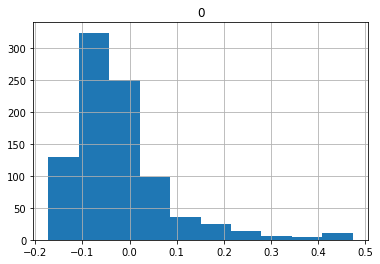

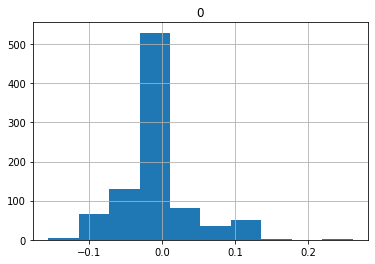

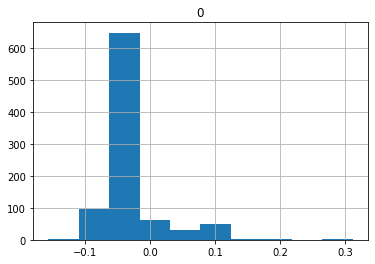

In [47]:
todf(y_test).hist()
todf(y_pred_test1).hist()
todf(y_pred_test2).hist()

In [48]:
profiling_num(todf(y_pred_test1))
profiling_num(y_pred_test2)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99


In [49]:
todf(y_pred_test2).describe()

,0
count,897.000000
mean,-0.026070
std,0.041434
min,-0.155965
25%,-0.033331
50%,-0.029856
75%,-0.029487
max,0.311246


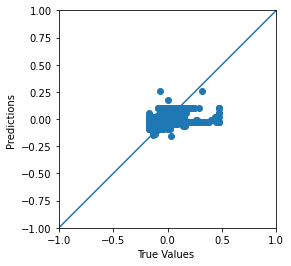

In [50]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_test1)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [-1, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


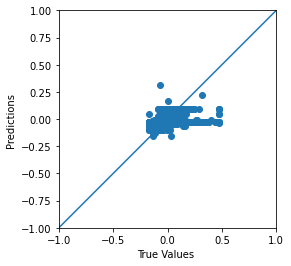

In [51]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_test2)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [-1, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
